In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [ ]:
original_dataset_dir_spoon = '/content/drive/My Drive/spoon-vs-fork/spoon'
original_dataset_dir_fork = '/content/drive/My Drive/spoon-vs-fork/fork'
base_dir = '/content/drive/My Drive/spoon-vs-fork'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_spoon_dir = os.path.join(train_dir, 'spoon')
train_fork_dir = os.path.join(train_dir, 'fork')
validation_spoon_dir = os.path.join(validation_dir, 'spoon')
validation_fork_dir = os.path.join(validation_dir, 'fork')

In [ ]:
print('total training spoon images:', len(os.listdir(train_spoon_dir)))
print('total training fork images:', len(os.listdir(train_fork_dir)))
print('total validation spoon images:', len(os.listdir(validation_spoon_dir)))
print('total validation fork images:', len(os.listdir(validation_fork_dir)))

total training spoon images: 386
total training fork images: 90
total validation spoon images: 50
total validation fork images: 50


In [ ]:
from tensorflow.keras import datasets, layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                11214880  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 11,216,705
Trainable params: 11,216,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-6),
metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=5,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=(150, 150),
    batch_size=2,
    class_mode='binary')

Found 473 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)
label_batch 0.0


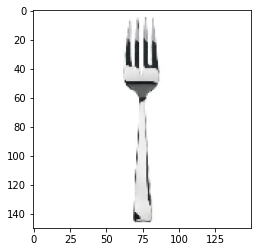

1
data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)
label_batch 1.0


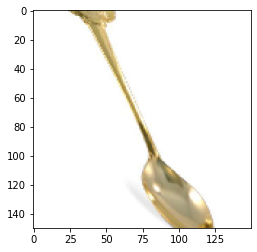

2
data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)
label_batch 0.0


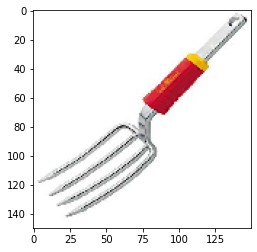

3
data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)
label_batch 1.0


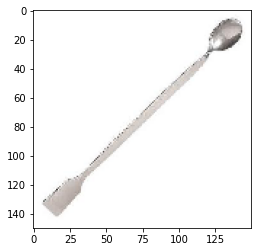

4
4


In [ ]:
#testing
#print(type(train_generator))
import matplotlib.pyplot as plt

counter =0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print("label_batch",labels_batch[counter])
    plt.imshow(data_batch[counter])
    
    plt.show()
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)  

# label == 0 (fork)
# label == 1 (spoon)

In [ ]:
import pickle

modelStoragePath = "drive/My Drive/"
def saveData(model, history, iteration):
    modelFile = modelStoragePath + "model_spoons_vs_forks" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "model_history_spoon_vs_forks" + str(iteration).strip() + ".pkle"
    model.save(modelFile)
    #saving history file too
    with open(historyFile, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    return modelFile, historyFile

import tensorflow.keras.models
def loadData(iteration):
    modelFile = modelStoragePath + "model_spoons_vs_forks" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "model_history_spoon_vs_forks" + str(iteration).strip() + ".pkle"
    model = models.load_model(modelFile)
    with open(historyFile, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return model, history

In [ ]:
#Listing 5.8 Fitting the model using a batch generator
#Please use Model.fit, which supports generators.
history = model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2)



Epoch 1/10
2/2 [==============================] - 2s 1s/step - loss: 0.5443 - acc: 1.0000 - val_loss: 0.7624 - val_acc: 0.5000
Epoch 2/10
2/2 [==============================] - 3s 1s/step - loss: 0.7211 - acc: 0.6000 - val_loss: 0.9731 - val_acc: 0.2500
Epoch 3/10
2/2 [==============================] - 2s 1s/step - loss: 0.5508 - acc: 0.7000 - val_loss: 0.3430 - val_acc: 1.0000
Epoch 4/10
2/2 [==============================] - 3s 1s/step - loss: 0.5685 - acc: 0.7000 - val_loss: 0.9604 - val_acc: 0.2500
Epoch 5/10
2/2 [==============================] - 2s 1s/step - loss: 0.5373 - acc: 0.8000 - val_loss: 0.6094 - val_acc: 0.7500
Epoch 6/10
2/2 [==============================] - 2s 903ms/step - loss: 0.5435 - acc: 0.7000 - val_loss: 0.8709 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 2s 883ms/step - loss: 0.4113 - acc: 0.9000 - val_loss: 0.9341 - val_acc: 0.5000
Epoch 8/10
2/2 [==============================] - 2s 809ms/step - loss: 0.4658 - acc: 0.8000 - val_loss: 

In [ ]:
model.save("drive/My Drive/spoon-vs-fork")

INFO:tensorflow:Assets written to: drive/My Drive/spoon-vs-fork/assets


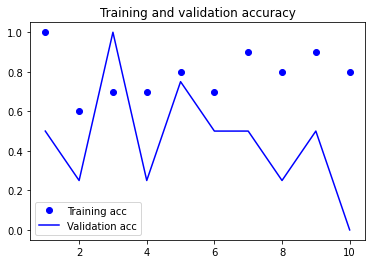

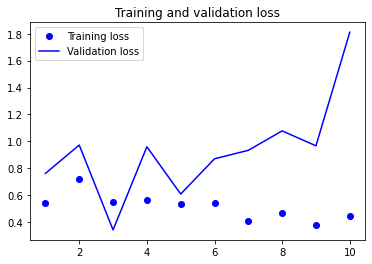

In [ ]:
#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


**Augmentation on dataset**

/content/drive/My Drive/spoon-vs-fork/spoon/00000116.jpg


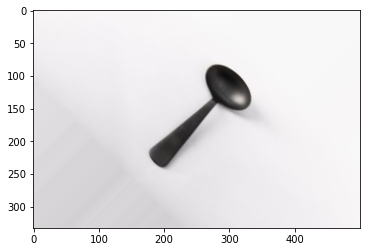

In [ ]:
file_sample = os.path.join(original_dataset_dir_spoon, os.listdir(original_dataset_dir_spoon)[0])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 30., 'shear': 30})
plt.imshow(tr_img);

In [ ]:
import os, shutil
spoon_files_filtered = []
spoon_files = ['000000{}.jpg'.format(i) for i in range(1, 100)]
for file in spoon_files:
  image = os.path.join(original_dataset_dir_spoon, file)
  if os.path.exists(image):
    print(image," Already Exists")
    spoon_files_filtered.append(file)

spoon_files = ['00000{}.jpg'.format(i) for i in range(101, 197)]
for file in spoon_files:
  image = os.path.join(original_dataset_dir_spoon, file)
  if os.path.exists(image):
    print(image," Already Exists")
    spoon_files_filtered.append(file)
    print(len(spoon_files_filtered))


    src_file_path = os.path.join(original_dataset_dir_spoon, file)
    img = plt.imread(src_file_path)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("0", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_spoon_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("0", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_spoon_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("0", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_spoon_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("0", "-sheared_image-")
    dst_file_path = os.path.join(train_spoon_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("0", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_spoon_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)
  else:
    continue
        


/content/drive/My Drive/spoon-vs-fork/spoon/00000010.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000012.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000014.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000015.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000017.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000021.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000022.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000024.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000026.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000027.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000029.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000031.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/00000033.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/spoon/0000003

In [ ]:
fork_files_filtered = []
fork_files = ['000000{}.jpg'.format(i) for i in range(1, 100)]
for file in fork_files:
  image = os.path.join(original_dataset_dir_fork, file)
  if os.path.exists(image):
    print(image," Already Exists")
    fork_files_filtered.append(file)

fork_files = ['00000{}.jpg'.format(i) for i in range(101, 499)]
for file in fork_files:
  image = os.path.join(original_dataset_dir_fork, file)
  if os.path.exists(image):
    print(image," Already Exists")
    fork_files_filtered.append(file)
    

    src_file_path = os.path.join(original_dataset_dir_fork, file)
    img = plt.imread(src_file_path)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("0", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_fork_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("0", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_fork_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("0", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_fork_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("0", "-sheared_image-")
    dst_file_path = os.path.join(train_fork_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("0", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_fork_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)
  else:
    continue

print(len(fork_files_filtered))

/content/drive/My Drive/spoon-vs-fork/fork/00000010.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000011.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000012.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000014.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000016.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000017.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000018.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000019.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000020.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000021.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000022.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000023.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000026.jpg  Already Exists
/content/drive/My Drive/spoon-vs-fork/fork/00000028.jpg  Already

In [ ]:
print(len(train_fork_dir))
print(len(train_spoon_dir))

48
49


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-6), metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=100,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

Found 3198 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


data batch shape: (100, 150, 150, 3)
labels batch shape: (100,)
label_batch 1.0


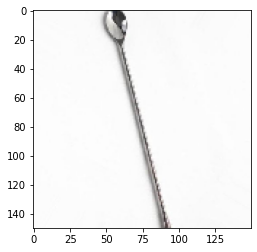

1
data batch shape: (100, 150, 150, 3)
labels batch shape: (100,)
label_batch 0.0


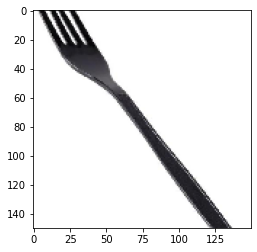

2
data batch shape: (100, 150, 150, 3)
labels batch shape: (100,)
label_batch 1.0


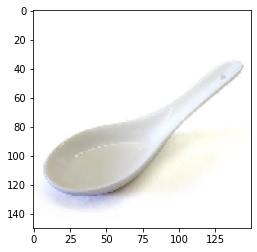

3
data batch shape: (100, 150, 150, 3)
labels batch shape: (100,)
label_batch 1.0


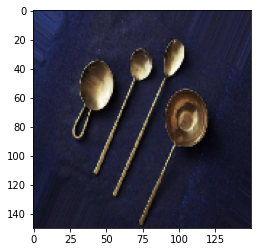

4
4


In [ ]:
#testing
#print(type(train_generator))
import matplotlib.pyplot as plt

counter =0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print("label_batch",labels_batch[counter])
    plt.imshow(data_batch[counter])
    
    plt.show()
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)  

# label == 0 (fork)
# label == 1 (spoon)

In [ ]:
#Listing 5.8 Fitting the model using a batch generator
#Please use Model.fit, which supports generators.
history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10)

modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

Epoch 1/10
30/30 [==============================] - 127s 4s/step - loss: 0.6782 - acc: 0.6321 - val_loss: 0.7189 - val_acc: 0.4000
Epoch 2/10
30/30 [==============================] - 127s 4s/step - loss: 0.6708 - acc: 0.6418 - val_loss: 0.6845 - val_acc: 0.5600
Epoch 3/10
30/30 [==============================] - 126s 4s/step - loss: 0.6668 - acc: 0.6471 - val_loss: 0.6941 - val_acc: 0.5600
Epoch 4/10
30/30 [==============================] - 129s 4s/step - loss: 0.6622 - acc: 0.6454 - val_loss: 0.7326 - val_acc: 0.4400
Epoch 5/10
30/30 [==============================] - 126s 4s/step - loss: 0.6581 - acc: 0.6478 - val_loss: 0.6994 - val_acc: 0.5400
Epoch 6/10
30/30 [==============================] - 126s 4s/step - loss: 0.6566 - acc: 0.6478 - val_loss: 0.7197 - val_acc: 0.5200
Epoch 7/10
30/30 [==============================] - 126s 4s/step - loss: 0.6545 - acc: 0.6494 - val_loss: 0.6928 - val_acc: 0.5800
Epoch 8/10
30/30 [==============================] - 126s 4s/step - loss: 0.6586 - a

In [ ]:
print(type(history))
modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

<class 'tensorflow.python.keras.callbacks.History'>
drive/My Drive/model_spoons_vs_forks1.h5 drive/My Drive/model_history_spoon_vs_forks1.pkle Saved


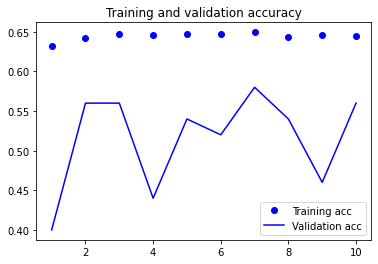

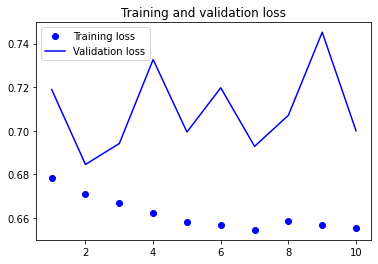

In [ ]:
#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
#Listing 5.13 Defining a new convnet that includes dropout
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 3198 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
batch_size = 20
history = model.fit(
    train_generator,
    steps_per_epoch=int(3100/batch_size),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=int(100/batch_size))

Epoch 1/30
155/155 [==============================] - 147s 948ms/step - loss: 0.6414 - acc: 0.6465 - val_loss: 0.7282 - val_acc: 0.5000
Epoch 2/30
155/155 [==============================] - 142s 918ms/step - loss: 0.6096 - acc: 0.6617 - val_loss: 0.6394 - val_acc: 0.6100
Epoch 3/30
155/155 [==============================] - 143s 920ms/step - loss: 0.5734 - acc: 0.6859 - val_loss: 0.6020 - val_acc: 0.7100
Epoch 4/30
155/155 [==============================] - 142s 917ms/step - loss: 0.5402 - acc: 0.7050 - val_loss: 0.7117 - val_acc: 0.5800
Epoch 5/30
155/155 [==============================] - 146s 941ms/step - loss: 0.5102 - acc: 0.7469 - val_loss: 0.4883 - val_acc: 0.7800
Epoch 6/30
155/155 [==============================] - 142s 918ms/step - loss: 0.4780 - acc: 0.7598 - val_loss: 0.5488 - val_acc: 0.7500
Epoch 7/30
155/155 [==============================] - 142s 919ms/step - loss: 0.4552 - acc: 0.7799 - val_loss: 0.5867 - val_acc: 0.7300
Epoch 8/30
155/155 [============================

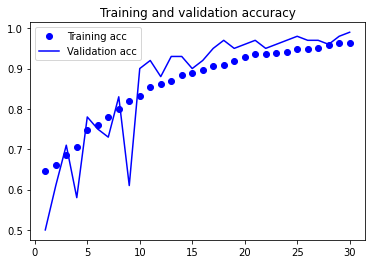

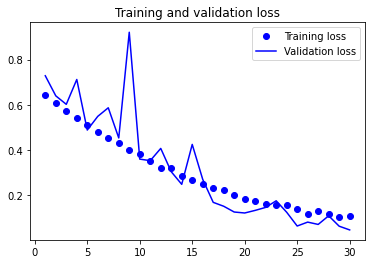

In [ ]:
#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('spoon-vs-fork.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("drive/My Drive/model_spoons_vs_forks1.h5")  

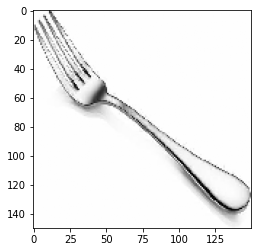

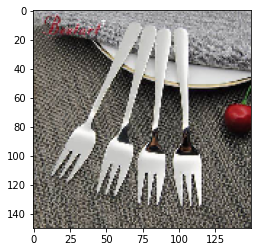

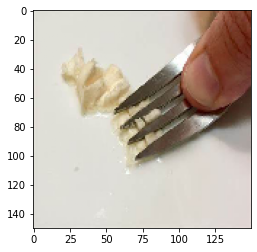

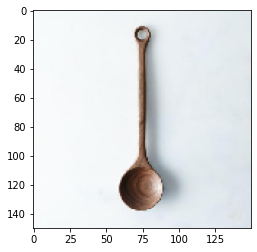

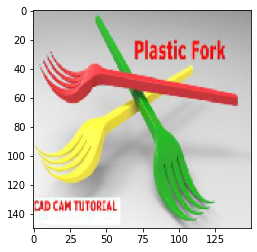

In [ ]:
import math
from random import randint
predList = []

images = [21,18,5,11,13]
for i in images:
  img_path = f"/content/drive/My Drive/spoon-vs-fork/test/{i}.jpg"

  from tensorflow.keras.preprocessing import image
  import numpy as np

  img = image.load_img(img_path, target_size = (150,150))

  img_tensor = image.img_to_array(img)

  img_tensor = np.expand_dims(img_tensor, axis = 0)

  img_tensor /= 255.

  predList.append(model.predict(img_tensor))

  import matplotlib.pyplot  as plt
  plt.imshow(img_tensor[0])
  plt.show()

In [ ]:
for pred in predList:
  if pred >= .50:
    print("spoon")
  else:
    print("fork")
predList

fork
fork
fork
spoon
fork


[array([[0.00031805]], dtype=float32),
 array([[6.2437596e-20]], dtype=float32),
 array([[0.25821126]], dtype=float32),
 array([[0.99816763]], dtype=float32),
 array([[1.882357e-11]], dtype=float32)]